In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [53]:
folha_url = "bases/base_final_folha_completo.xlsx"

In [54]:
folha = pd.read_excel(folha_url)
folha.shape 

(4630, 8)

# Organizando cartas | painel do leitor  da folha de são paulo

In [55]:
print("Quantidade painel do leitor \n")
folha.painel_do_leitor.value_counts(dropna = False)

Quantidade painel do leitor 



nao    4542
sim      88
Name: painel_do_leitor, dtype: int64

# ANÁLISE DE CLASSIFICAÇÃO ENTRE PAINEL DO LEITOR DA FOLHA

In [56]:
# quantas cartas estão em cada tipo de classificação ? 
grp_metaforico_painel_do_leitor = folha.groupby(["metaforico", "painel_do_leitor"], as_index = False).size().rename(columns = {"size": "quantidade_painel_do_leitor"})
grp_metaforico = folha.groupby("metaforico", as_index = False).size().rename(columns = {"size": "quantidade_metaforico"})
grp1 = grp_metaforico_painel_do_leitor.merge(grp_metaforico, on = "metaforico", how = "left")
grp1["percentual"] = (grp1["quantidade_painel_do_leitor"] / grp1["quantidade_metaforico"]) * 100
grp1

# A maior parte das cartas estão nos texto classificados como metafóricos

,metaforico,painel_do_leitor,quantidade_painel_do_leitor,quantidade_metaforico,percentual
0,nao,nao,3459,3496,98.941648
1,nao,sim,37,3496,1.058352
2,sim,nao,1083,1134,95.502646
3,sim,sim,51,1134,4.497354


### O que quer dizer? 
- Do que foi classificado como metafórico, 4.4% são originalmente do Painel do Leitor;

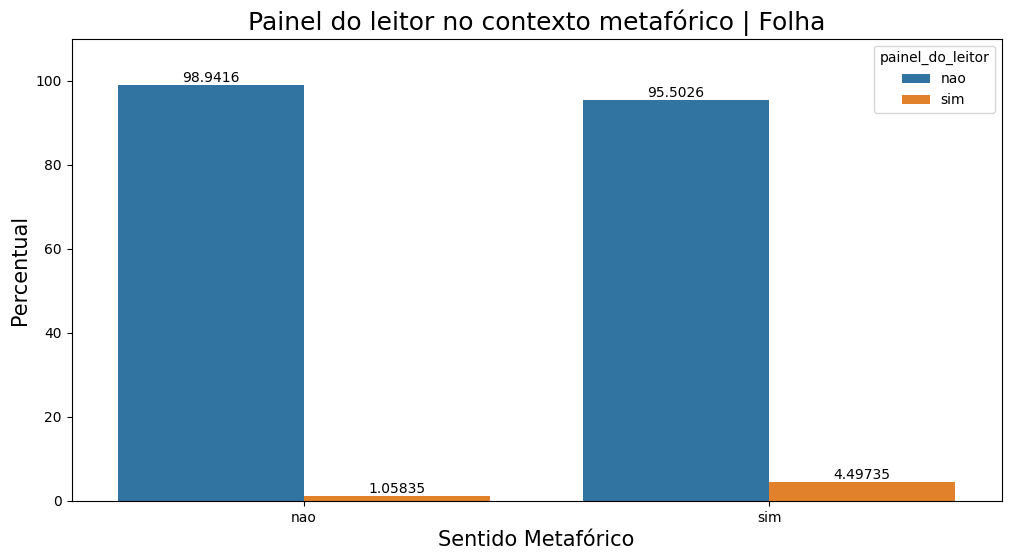

In [57]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = "metaforico", y = "percentual", hue = "painel_do_leitor", data = grp1)
ax.set_xlabel("Sentido Metafórico", fontsize = 15)
ax.set_ylabel("Percentual", fontsize = 15)
ax.set_title("Painel do leitor no contexto metafórico | Folha", fontsize = 18)
ax.set_ylim(0, 110)
for i in ax.containers:
    ax.bar_label(i,)
ax = ax 

In [58]:
grp_painel_do_leitor_metaforico = folha.groupby(["painel_do_leitor", "metaforico"], as_index = False).size().rename(columns = {"size": "quantidade_metaforicos"})
grp_painel_do_leitor = folha.groupby("painel_do_leitor", as_index = False).size().rename(columns = {"size": "quantidade_painel_do_leitor"})
grp11 = grp_painel_do_leitor_metaforico.merge(grp_painel_do_leitor, on = "painel_do_leitor", how = "left")
grp11["percentual"] = (grp11["quantidade_metaforicos"] / grp11["quantidade_painel_do_leitor"]) * 100
grp11


,painel_do_leitor,metaforico,quantidade_metaforicos,quantidade_painel_do_leitor,percentual
0,nao,nao,3459,4542,76.155878
1,nao,sim,1083,4542,23.844122
2,sim,nao,37,88,42.045455
3,sim,sim,51,88,57.954545


### O que quer dizer?
- Do Painel do Leitor encontrado, 57% foi calsssificado com uso no sentido metafórico;
- Do que não é Painel do leitor, 23% foi classificado como metafórico;

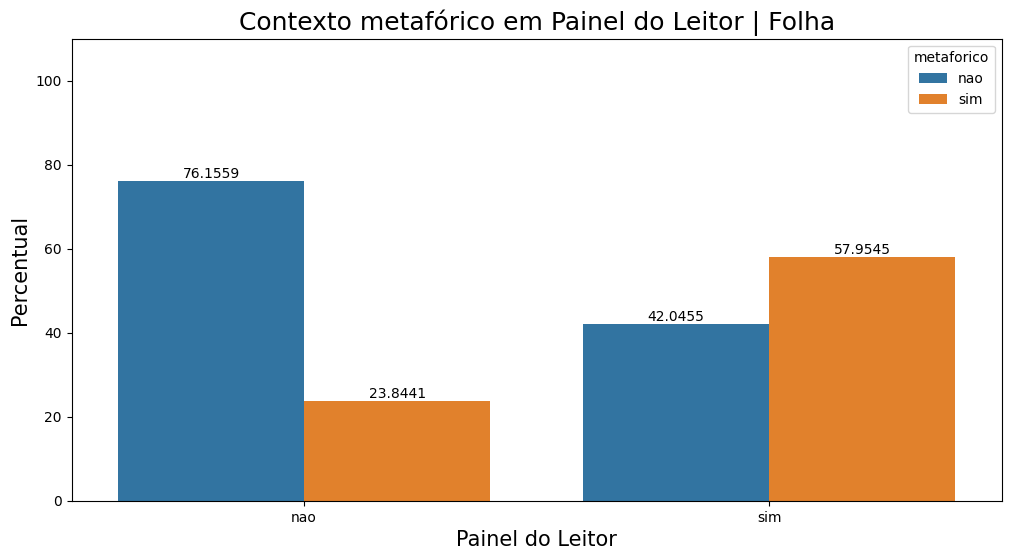

In [59]:
plt.figure(figsize = (12,6))
ax = sns.barplot(x = "painel_do_leitor", y = "percentual", hue = "metaforico", data = grp11)
ax.set_xlabel("Painel do Leitor", fontsize = 15)
ax.set_ylabel("Percentual", fontsize = 15)
ax.set_title("Contexto metafórico em Painel do Leitor | Folha", fontsize = 18)
ax.set_ylim(0, 110)
for i in ax.containers:
    ax.bar_label(i,)
ax = ax 

# Análises de proporcionalidades

In [60]:
grp_painel_do_leitor_metaforico

,painel_do_leitor,metaforico,quantidade_metaforicos
0,nao,nao,3459
1,nao,sim,1083
2,sim,nao,37
3,sim,sim,51


## O que significa: 
- Dentre os textos do Painel do Leitor, os texto classficados como não-metafórico estão na proporção de 1:1.37. Ou seja, a cada um painel do leitor classificada como não-metafórico, temos 1.37 classficadas como metafórico
- Dentre os textos de comuns, os textos calssificados como não-metafóricos estão na proporção de 1:0.31. Ou seja, a cada um painel do leitor classificada como não-metafórico, temos 0.31 sendo classificadas como metafóricos

In [61]:
!jupyter nbconvert --to html --no-input analise_painel_do_leitor_folha_completo.ipynb

[NbConvertApp] Converting notebook analise_painel_do_leitor_folha_completo.ipynb to html
[NbConvertApp] Writing 667285 bytes to analise_painel_do_leitor_folha_completo.html


In [62]:
# folha.to_excel("base_aplicacao_resultado/folha_cartas_identificadas.xlsx", index = False)
# estadao.to_excel("base_aplicacao_resultado/estadao_cartas_identificadas.xlsx", index = False)